In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
format_plots()
c = PlotConfig()

In [3]:
def minmax(df):
    df = df - df.min()
    return df / df.max()

def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female
m_df = load_male_long_df(average_weeks=True, merge_size=False, merge_ages=True, df_path=DF_PATHS.usage_male).groupby(['age','mouse']).mean()
f_df = load_female_long_df(average_weeks=True, merge_size=False, filter_female=True, merge_ages=True, df_path=DF_PATHS.usage_female).groupby(['age','mouse']).mean()

In [5]:
df = m_df.copy()

In [6]:
# upload syllable classes
syllable_classes = pd.read_csv('./v11_syllable_labels_v3.csv')
id_map = syllable_classes.set_index('Original ID')['Class']
class_sort = [id_map[k] for k in df.columns]

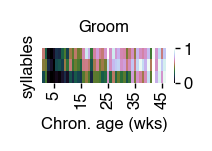

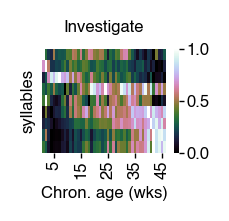

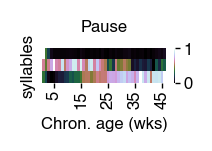

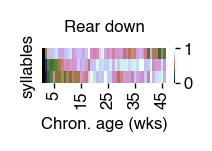

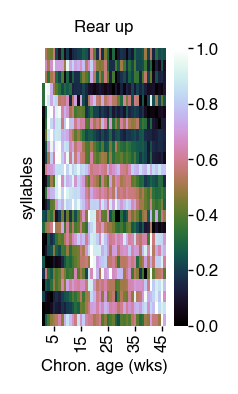

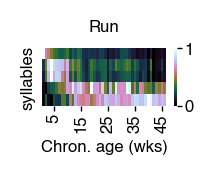

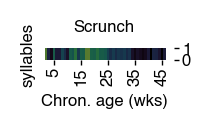

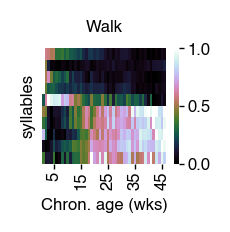

In [7]:
class_avgs = {}
class_norm_avgs = {}
for _class, _df in df.T.groupby(class_sort):
    avgs = _df.T.groupby('age').mean()
    class_avgs[_class] = avgs.mean(1)

    norm_avgs = minmax(avgs)

    peaks = (
        norm_avgs.rolling(7, min_periods=1, center=True, win_type="exponential")
        .mean(tau=3)
        .idxmax()
    )
    peaks = peaks.sort_values()
    class_norm_avgs[_class] = norm_avgs.mean(1)

    ages = avgs.index

    #fig = figure(1, 0.075 * avgs.shape[1])
    fig, ax = plt.subplots(figsize=(1, 0.075 * avgs.shape[1]))
    #plt.imshow(norm_avgs[peaks.index].T, cmap='cubehelix', extent=(ages[0], ages[-1], avgs.shape[1], 0), aspect='auto')
    sns.heatmap(norm_avgs[peaks.index].T, cmap='cubehelix')
    plt.title(_class)
    #plt.colorbar(label="Normalized usage")
    desired_ticks = [5, 15, 25, 35, 45]
    ax.set_xticks([x - 0.5 for x in desired_ticks])  # Adjust for center alignment
    ax.set_xticklabels(desired_ticks)
    plt.yticks([])
    plt.xlabel("Chron. age (wks)")
    #sns.despine()
    plt.gcf().set_rasterized(False)
    fig.savefig(c.dana_save_path / "fig3"/ f'male_class-{_class}.pdf')
    

In [8]:
class_df = pd.DataFrame(class_norm_avgs)
peaks = (
    class_df.rolling(7, min_periods=1, center=True, win_type="exponential")
    .mean(tau=3)
    .idxmax()
)
peaks = peaks.sort_values()

In [9]:
col_order = ['Pause', 'Scrunch', 'Groom', 'Rear down','Rear up','Run','Investigate','Walk']
class_df_new = class_df.reindex(columns=col_order)

[Text(4.5, 0, '5'),
 Text(14.5, 0, '15'),
 Text(24.5, 0, '25'),
 Text(34.5, 0, '35'),
 Text(44.5, 0, '45')]

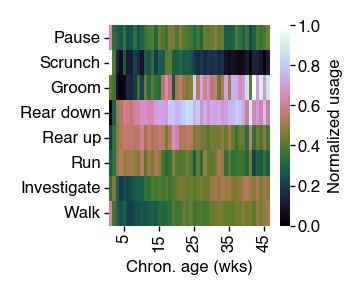

In [10]:
format_plots()
fig, ax = plt.subplots(figsize=(1.3, 1.3))
sns.heatmap(class_df_new.T, cmap='cubehelix', vmax=1, cbar_kws=dict(label='Normalized usage'))
plt.xlabel("Chron. age (wks)")
# Set specific x-ticks and labels
desired_ticks = [5, 15, 25, 35, 45]
ax.set_xticks([x - 0.5 for x in desired_ticks])  # Adjust for center alignment
ax.set_xticklabels(desired_ticks)

In [11]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig3"/ 'male_syll_clusters_avg.pdf')

In [12]:
df = f_df.copy()

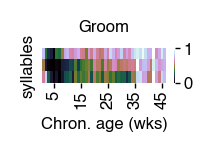

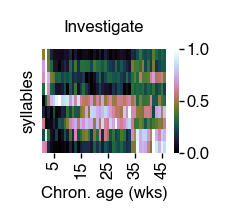

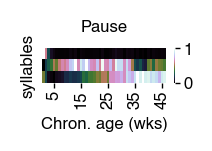

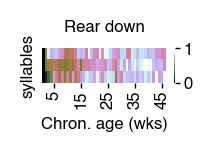

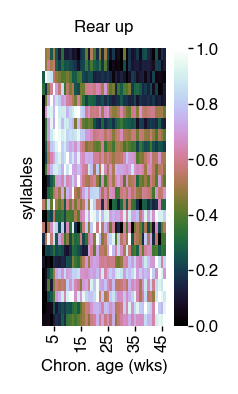

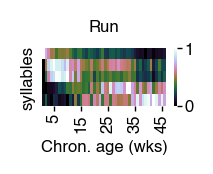

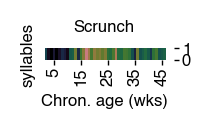

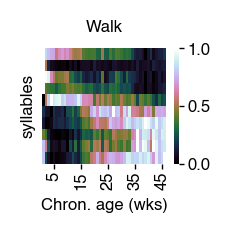

In [13]:
class_avgs = {}
class_norm_avgs = {}
for _class, _df in df.T.groupby(class_sort):
    avgs = _df.T.groupby('age').mean()
    class_avgs[_class] = avgs.mean(1)

    norm_avgs = minmax(avgs)

    peaks = (
        norm_avgs.rolling(7, min_periods=1, center=True, win_type="exponential")
        .mean(tau=3)
        .idxmax()
    )
    peaks = peaks.sort_values()
    class_norm_avgs[_class] = norm_avgs.mean(1)

    ages = avgs.index

    #fig = figure(1, 0.075 * avgs.shape[1])
    fig, ax = plt.subplots(figsize=(1, 0.075 * avgs.shape[1]))
    #plt.imshow(norm_avgs[peaks.index].T, cmap='cubehelix', extent=(ages[0], ages[-1], avgs.shape[1], 0), aspect='auto')
    sns.heatmap(norm_avgs[peaks.index].T, cmap='cubehelix')
    plt.title(_class)
    #plt.colorbar(label="Normalized usage")
    desired_ticks = [5, 15, 25, 35, 45]
    ax.set_xticks([x - 0.5 for x in desired_ticks])  # Adjust for center alignment
    ax.set_xticklabels(desired_ticks)
    plt.yticks([])
    plt.xlabel("Chron. age (wks)")
    #sns.despine()
    plt.gcf().set_rasterized(False)
    fig.savefig(c.dana_save_path / "fig3"/ f'female_class-{_class}.pdf')
    

In [14]:
class_df = pd.DataFrame(class_norm_avgs)
peaks = (
    class_df.rolling(7, min_periods=1, center=True, win_type="exponential")
    .mean(tau=3)
    .idxmax()
)
peaks = peaks.sort_values()

In [15]:
col_order = ['Pause', 'Scrunch', 'Groom', 'Rear down','Rear up','Run','Investigate','Walk']
class_df_new = class_df.reindex(columns=col_order)

[Text(4.5, 0, '5'),
 Text(14.5, 0, '15'),
 Text(24.5, 0, '25'),
 Text(34.5, 0, '35'),
 Text(44.5, 0, '45')]

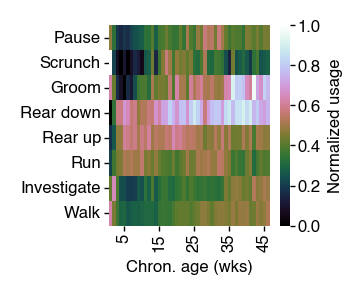

In [16]:
format_plots()
fig, ax = plt.subplots(figsize=(1.3, 1.3))
sns.heatmap(class_df_new.T, cmap='cubehelix', vmax=1, cbar_kws=dict(label='Normalized usage'))
plt.xlabel("Chron. age (wks)")
# Set specific x-ticks and labels
desired_ticks = [5, 15, 25, 35, 45]
ax.set_xticks([x - 0.5 for x in desired_ticks])  # Adjust for center alignment
ax.set_xticklabels(desired_ticks)

In [17]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig3"/ 'female_syll_clusters_avg.pdf')